In [6]:
from qiskit import QuantumCircuit, assemble, Aer, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from math import sqrt, pi

In [15]:
# to load instructions into QuantumCircuit
sim = Aer.get_backend('aer_simulator')

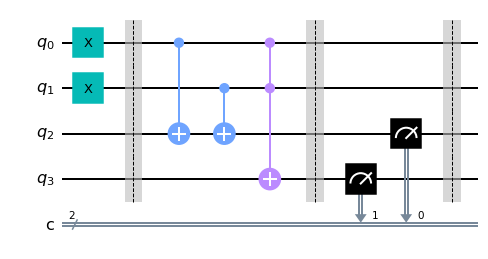

In [16]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

# initial_state = [0,1]
# qc.initialize(initial_state, 0)

qc.x(qreg_q[0])
qc.x(qreg_q[1])
qc.barrier()

qc.cx(qreg_q[0], qreg_q[2])
qc.cx(qreg_q[1], qreg_q[2])
qc.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
qc.barrier()


qc.measure(qreg_q[3], creg_c[1])
qc.measure(qreg_q[2], creg_c[0])

qc.save_statevector()

qc.draw('mpl')

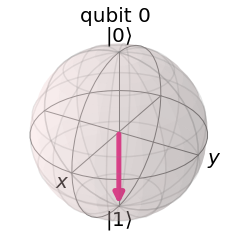

In [24]:
# simulate the circuit
result = sim.run(qc).result()

plot_bloch_multivector(result.get_statevector())

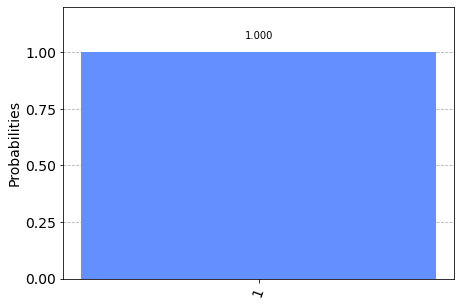

In [25]:
# shot the sates probabilities
plot_histogram(result.get_counts())

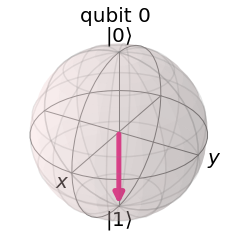

In [19]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)